### EDA

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nlp import preprocessing as pp
import nltk
from wordcloud import WordCloud
plt.rcParams["figure.figsize"] = (10, 6)
print("imported sucessfully")

imported sucessfully


#### Loading the Cambridge Readability Data Frame

In [294]:
df = pd.read_csv('data/cefr_readings.csv')

In [295]:
df.head()

,documents,cefr_level
0,The Long Night This is David Reilly's first bo...,A2
1,Most house burglaries happen between 2 p.m. an...,A2
2,One very famous place for tourists in London i...,A2
3,To: All staff Subject: Holidays From: D Brown ...,A2
4,Canada Geese are large blue and white birds. W...,A2


#### Break the Data Frame into pieces sentence-wise

In [296]:
sent_df = pp.get_sentences(df, 'documents', 'cefr_level')

In [297]:
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,The Long Night This is David Reilly's first book.,10,3.90,A2,0
1,David became a writer after teaching English f...,10,5.30,A2,0
2,"Maha is a nurse in northern Australia, where s...",14,4.29,A2,0
3,One day a baby is so ill that Maha has to driv...,22,3.23,A2,0
4,They have a lot of problems getting there and ...,19,4.47,A2,0
...,...,...,...,...,...
9532,It seems that a bunch of scientists are gettin...,30,4.63,C2,330
9533,Sure we all know its the age-old quest for kno...,23,4.26,C2,330
9534,But what these guys want to know is why we wan...,31,3.42,C2,330
9535,"Surely, it's more important to know whether wh...",28,4.18,C2,330


In [298]:
sentence_df.dtypes

text              object
num_of_words       int64
avg_len_words    float64
level             object
doc_id             int64
dtype: object

In [299]:
# checking for null values
sentence_df.isna().sum()

text             0
num_of_words     0
avg_len_words    0
level            0
doc_id           0
dtype: int64

## lets check the numeric stats of the sentence_df

In [300]:
numeric_stats=sentence_df.describe()
numeric_stats

,num_of_words,avg_len_words,doc_id
count,9537.000000,9537.000000,9537.000000
mean,18.369613,4.422951,200.957010
std,10.162089,0.758754,82.622136
min,1.000000,1.750000,0.000000
25%,11.000000,3.940000,145.000000
50%,17.000000,4.380000,210.000000
75%,24.000000,4.870000,268.000000
max,114.000000,12.000000,330.000000


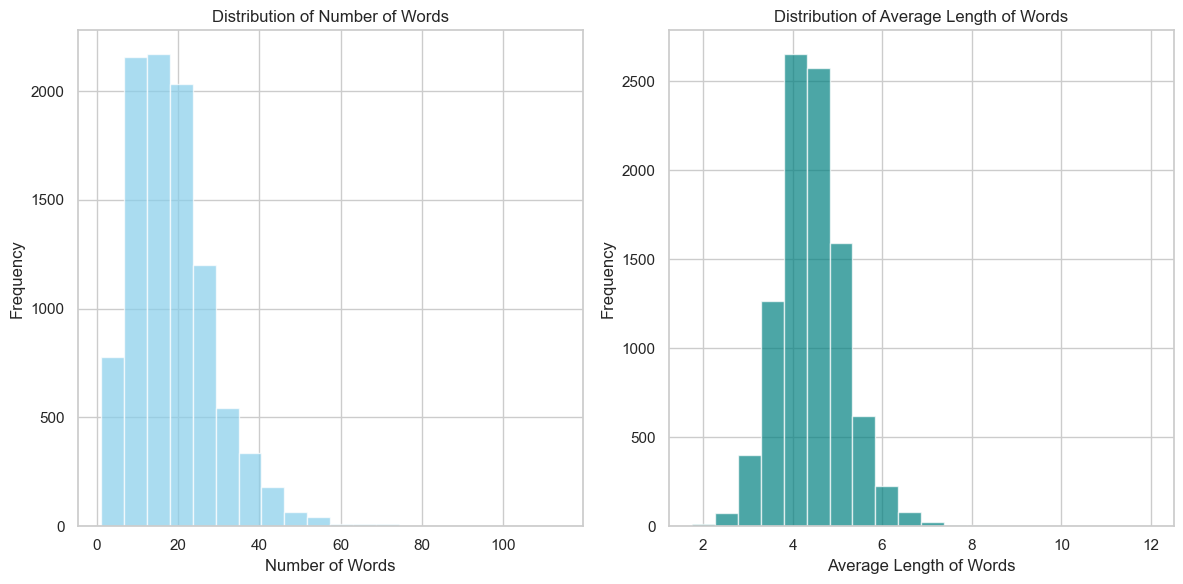

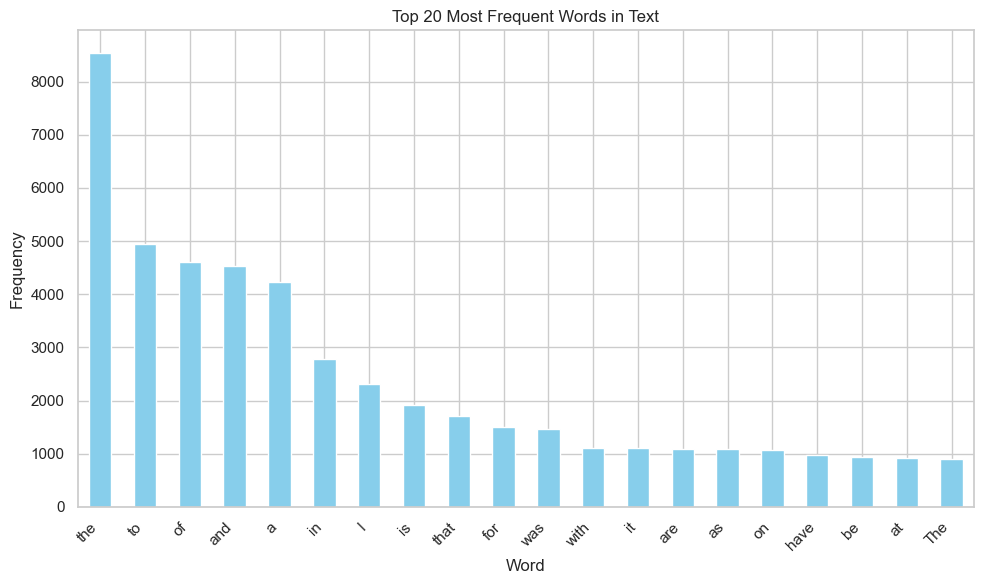

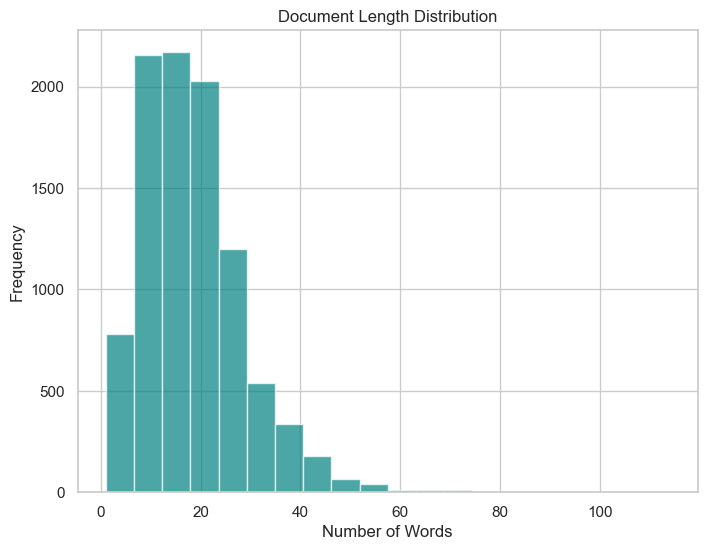

In [307]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(sentence_df['num_of_words'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(sentence_df['avg_len_words'], bins=20, color='teal', alpha=0.7)
plt.title('Distribution of Average Length of Words')
plt.xlabel('Average Length of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bar plot of most frequent words
word_freq = sentence_df['text'].str.split(expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
word_freq[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Text')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Document Length Distribution
plt.figure(figsize=(8, 6))
plt.hist(sentence_df['num_of_words'], bins=20, color='teal', alpha=0.7)
plt.title('Document Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

#### imspecting the length of the readings by level: 

### The chart below show the sum of number of words and length of the words per document

In [ ]:
sentence_df.groupby(['level', 'doc_id']).sum()

text  num_of_words  \
level doc_id                                                                    
A2    0       The Long Night This is David Reilly's first bo...           186   
      1       Most house burglaries happen between 2 p.m. an...           196   
      2       One very famous place for tourists in London i...           116   
      3       To: All staff Subject: Holidays From: D Brown ...           110   
      4       Canada Geese are large blue and white birds.Wh...           197   
...                                                         ...           ...   
C2    326     Some time ago, a website highlighted the risks...           775   
      327     A course at the Bamboo Bike Club, run by engin...           885   
      328     The two sisters kept Lily's driving a secret f...           950   
      329     I have never begun a novel with more misgiving...           780   
      330     The transfer to London from Stratford of an ex...           466   

              avg_len_words  
level doc_id                 
A2    0               46.41  
      1               50.81  
      2               42.32  
      3               30.68  
      4               66.02  
...                     ...  
C2    326            184.16  
      327            210.02  
      328            262.66  
      329            118.86  
      330            100.64  

[331 rows x 3 columns]

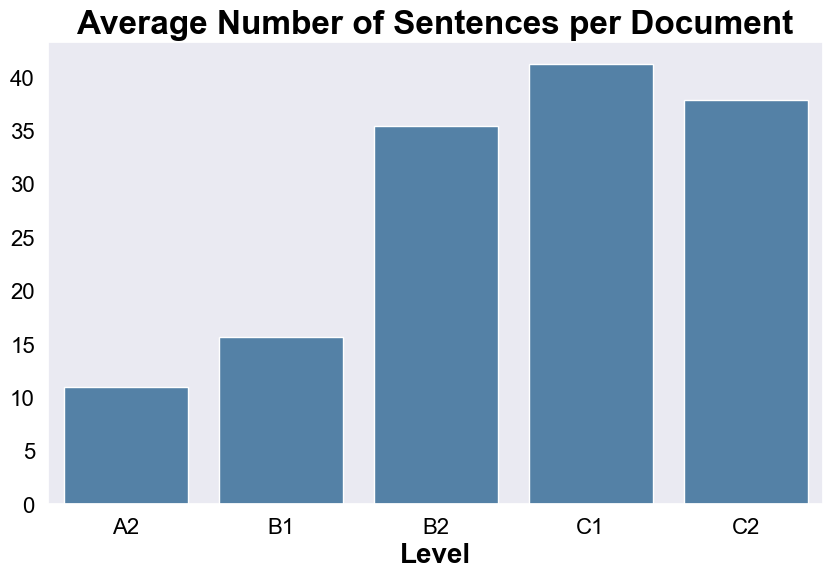

In [ ]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'avg_number_sentences': avg})

font = {
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Average Number of Sentences per Document', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

In [ ]:
avg_sentences = avg.tolist()
levels = ['A2', 'B1', 'B2', 'C1', 'C2']
x = range(5)

In [ ]:
avg_sentences

[10.984375,
 15.666666666666666,
 35.45070422535211,
 41.23880597014925,
 37.88405797101449]

<function matplotlib.pyplot.show(close=None, block=None)>

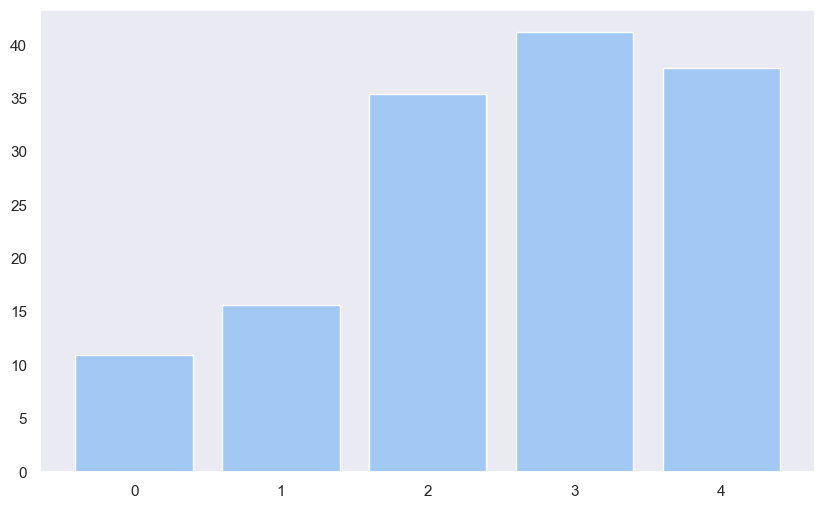

In [ ]:
plt.bar(x, avg_sentences)
plt.show

In [ ]:
sentence_df.columns

Index(['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'], dtype='object')

## average number of words per text for each unique value in the 'level' column in the sentence_df

In [ ]:
avg = sentence_df.groupby(['level']).sum()['num_of_words'] / sentence_df.groupby(['level']).count()['text']
avg

level
A2    12.896159
B1    17.441489
B2    17.737783
C1    18.955121
C2    20.164881
dtype: float64

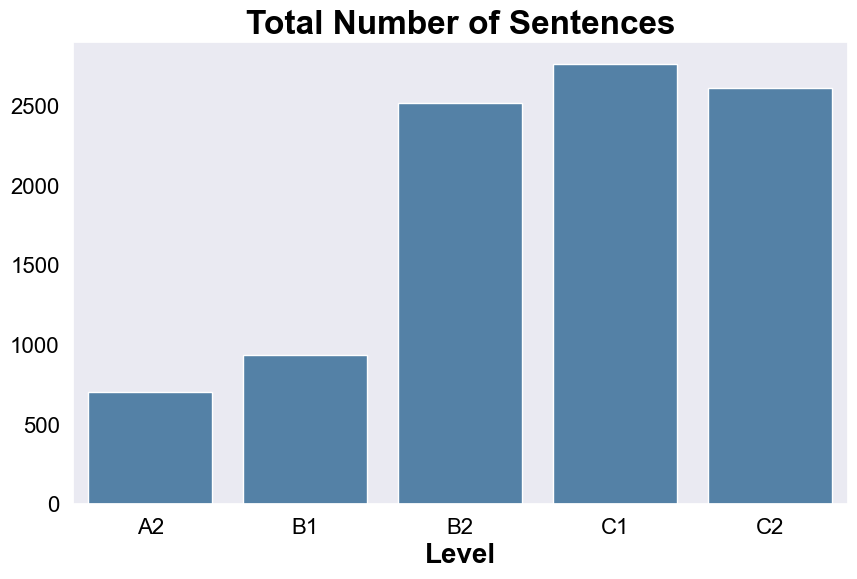

In [ ]:
avg = sentence_df.groupby(['level']).count()['text']

df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg})

font = {
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Total Number of Sentences', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

In [ ]:
print(sentence_df['num_of_words'].dtype)

int64


### average number of words per document versus the average words length

In [ ]:
sns.set_theme(style="dark", font_scale=1.85)

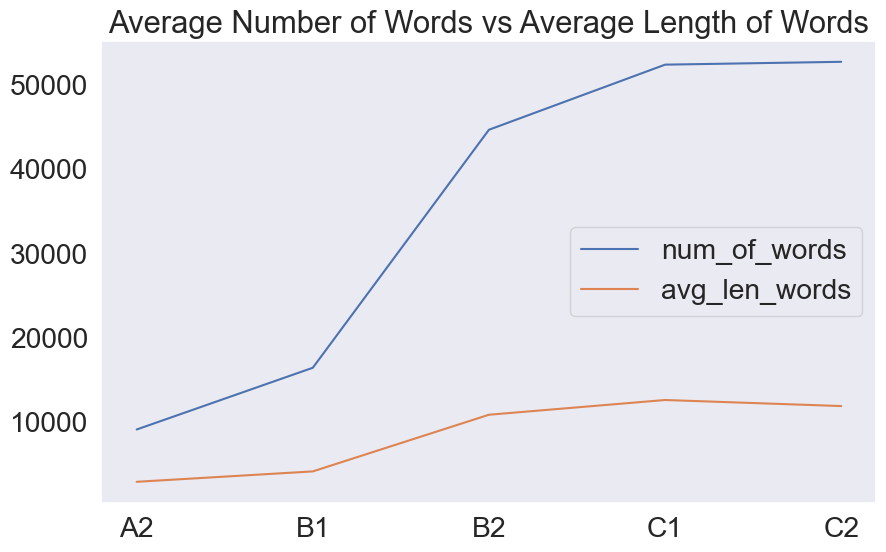

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
word_data = sentence_df.groupby(['level']).sum()[['num_of_words', 'avg_len_words']]
plt.plot(word_data)
plt.title(label='Average Number of Words vs Average Length of Words')
plt.legend(word_data.columns, loc="center right")
plt.show()

In [ ]:
# Reload the data
df = pd.read_csv('data/cefr_readings.csv')

In [ ]:
df.cefr_level

0      A2
1      A2
2      A2
3      A2
4      A2
       ..
326    C2
327    C2
328    C2
329    C2
330    C2
Name: cefr_level, Length: 331, dtype: object

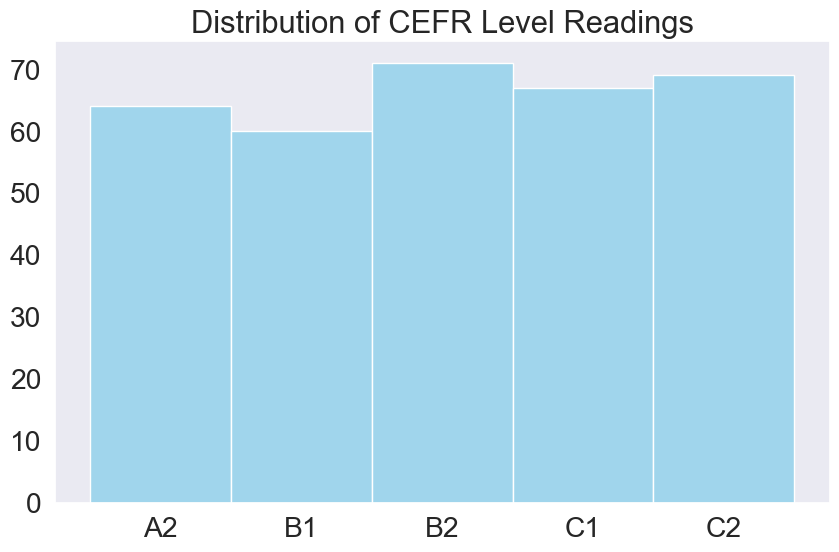

Text(0.5, 1.0, 'Distribution of CEFR Level Readings')

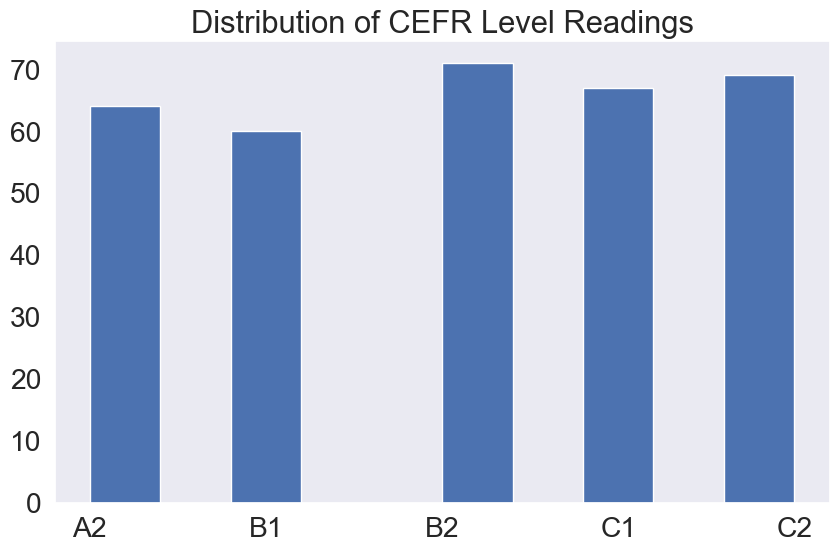

In [ ]:
sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
sns.set_theme(style="dark", font_scale=1.85)
plt.xlabel("")
plt.ylabel("")
plt.show()
plt.hist(df.cefr_level)
plt.title('Distribution of CEFR Level Readings')

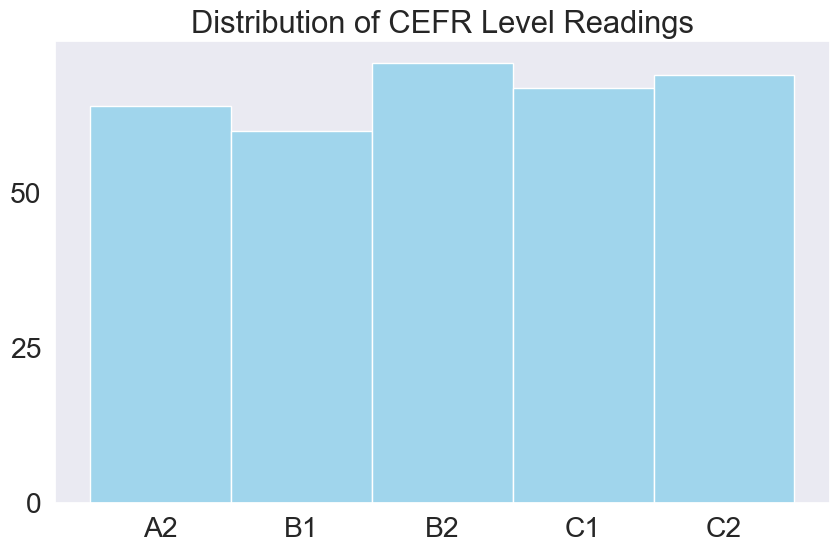

In [ ]:
plt.close('all')
sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
sns.set_theme(style="dark", font_scale=4)
plt.xlabel("")
plt.ylabel("")
plt.show()

## More Exploratory Data Analysis on combined Cambridge and One-Stop Data Sets

In [ ]:
sentence_df = pp.preprocess_all(sentence_df, 'text')
stats = pp.get_tokenized_word_stats(df, 'documents')

In [ ]:
df_stats = pd.DataFrame.from_records(stats, columns =['total_words', 'total_sentences', 'avg_sent_len', 'max_sent_len', 'min_sent_len'])
df_stats['avg_sent_len'] = round(df_stats.avg_sent_len, 2)
df_stats

,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,186,11,16.91,35,10
1,196,12,16.33,23,6
2,116,10,11.60,19,6
3,110,8,13.75,35,1
4,197,16,12.31,23,5
...,...,...,...,...,...
326,775,40,19.38,48,1
327,885,47,18.83,56,3
328,950,62,15.32,47,2
329,780,30,26.00,55,8


In [ ]:
data = pd.merge(df, df_stats, left_index=True, right_index=True)
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,The Long Night This is David Reilly's first bo...,A2,186,11,16.91,35,10
1,Most house burglaries happen between 2 p.m. an...,A2,196,12,16.33,23,6
2,One very famous place for tourists in London i...,A2,116,10,11.60,19,6
3,To: All staff Subject: Holidays From: D Brown ...,A2,110,8,13.75,35,1
4,Canada Geese are large blue and white birds. W...,A2,197,16,12.31,23,5
...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,775,40,19.38,48,1
327,"A course at the Bamboo Bike Club, run by engin...",C2,885,47,18.83,56,3
328,The two sisters kept Lily's driving a secret f...,C2,950,62,15.32,47,2
329,I have never begun a novel with more misgiving...,C2,780,30,26.00,55,8


<Axes: xlabel='avg_sent_len', ylabel='Density'>

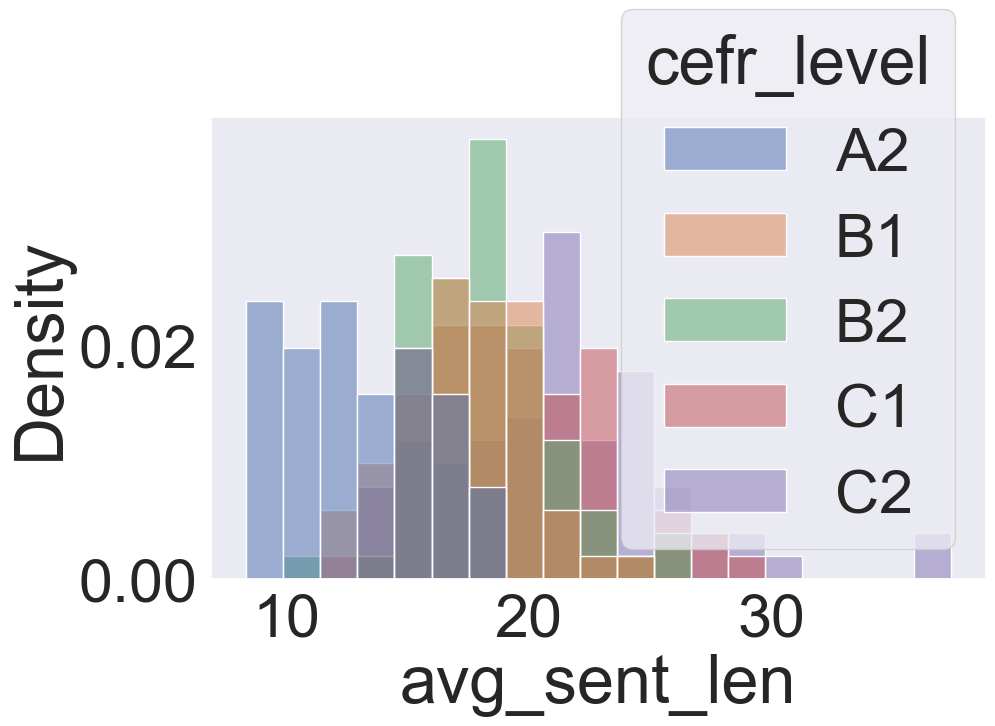

In [ ]:
sns.histplot(data=data, x='avg_sent_len', hue='cefr_level', stat="density")

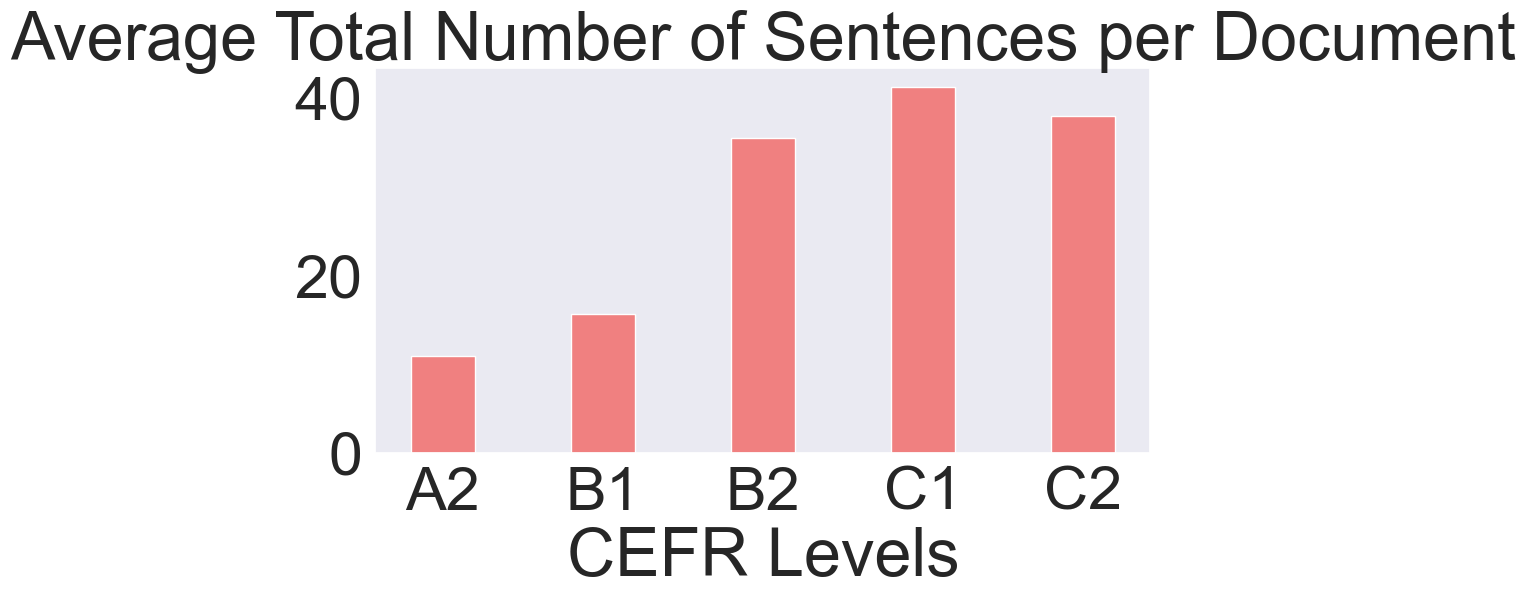

In [ ]:
numb = data.groupby('cefr_level')['total_sentences'].mean().tolist()
num_d = {'A2': numb[0], 'B1': numb[1], 'B2': numb[2], 'C1': numb[3], 'C2': numb[4]}
num_d
levels = list(num_d.keys())
words = list(num_d.values()) 
fig = plt.figure(figsize = (10, 5))
plt.bar(levels, words, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("CEFR Levels")
plt.title("Average Total Number of Sentences per Document")
plt.show()
#numb

In [ ]:
levels = data.groupby('cefr_level')['total_words'].mean().index.tolist()
levels

['A2', 'B1', 'B2', 'C1', 'C2']

In [ ]:
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,The Long Night This is David Reilly's first bo...,A2,186,11,16.91,35,10
1,Most house burglaries happen between 2 p.m. an...,A2,196,12,16.33,23,6
2,One very famous place for tourists in London i...,A2,116,10,11.60,19,6
3,To: All staff Subject: Holidays From: D Brown ...,A2,110,8,13.75,35,1
4,Canada Geese are large blue and white birds. W...,A2,197,16,12.31,23,5
...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,775,40,19.38,48,1
327,"A course at the Bamboo Bike Club, run by engin...",C2,885,47,18.83,56,3
328,The two sisters kept Lily's driving a secret f...,C2,950,62,15.32,47,2
329,I have never begun a novel with more misgiving...,C2,780,30,26.00,55,8


In [ ]:
def multiplotter(data, filter_col, plot_col, plot_label):
    sns.set_theme(style="whitegrid")

    fig, axs = plt.subplots(2, 3, figsize=(12,8), sharey='row')
    levels = data.groupby(filter_col)[plot_col].mean().index.tolist()

    color_palette = {'C': 'skyblue', 'B': 'red', 'A': 'teal'}

    for i, level in enumerate(levels):
        row = i // 3
        col = i % 3
        colour = color_palette[level[0]]
        
        plot_data = data[data[filter_col] == level][plot_col]

        sns.histplot(plot_data, ax=axs[row, col], color=colour,kde=True)
        axs[row, col].set_title(label=level)
        axs[row, col].set_xlabel(plot_label)
        axs[row, col].set_ylabel('Frequency')

    fig.delaxes(axs[1, 2])
    plt.tight_layout()
    plt.show()


<Axes: xlabel='total_words', ylabel='Count'>

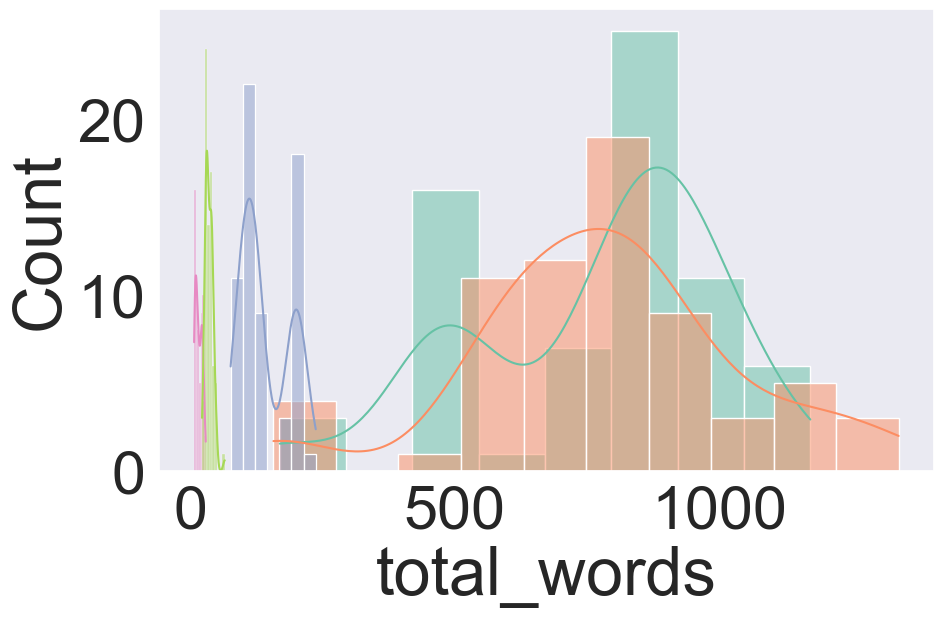

In [ ]:
# Define a color palette using seaborn's color_palette() function
palette = sns.color_palette("Set2")

# Plotting histograms with the defined color palette
sns.histplot(data=data[data.cefr_level == 'C2']['total_words'], color=palette[0], label="C2", kde=True)
sns.histplot(data=data[data.cefr_level == 'C1']['total_words'], color=palette[1], label="C1", kde=True)
sns.histplot(data=data[data.cefr_level == 'A2']['total_words'], color=palette[2], label="A2", kde=True)
sns.histplot(data=data[data.cefr_level == 'B1']['total_sentences'], color=palette[3], label="B1", kde=True)
sns.histplot(data=data[data.cefr_level == 'B2']['total_sentences'], color=palette[4], label="B2", kde=True)


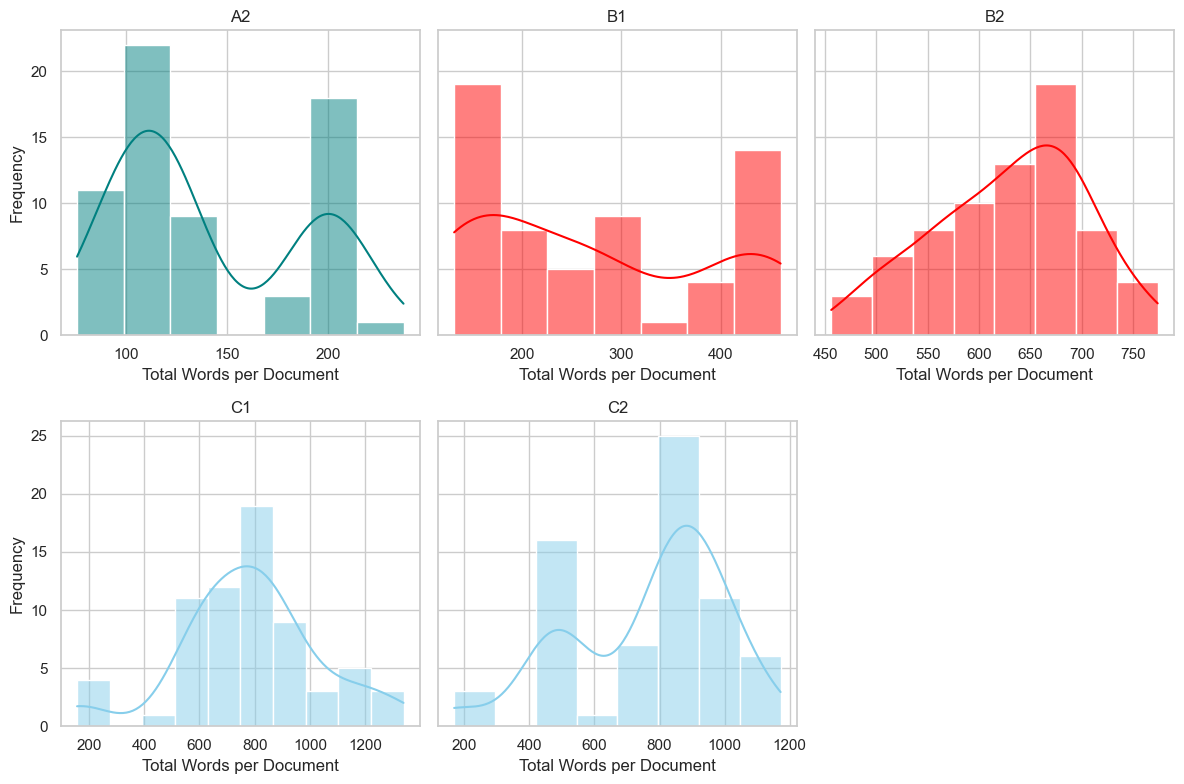

In [ ]:
multiplotter(data, 'cefr_level', 'total_words', 'Total Words per Document')

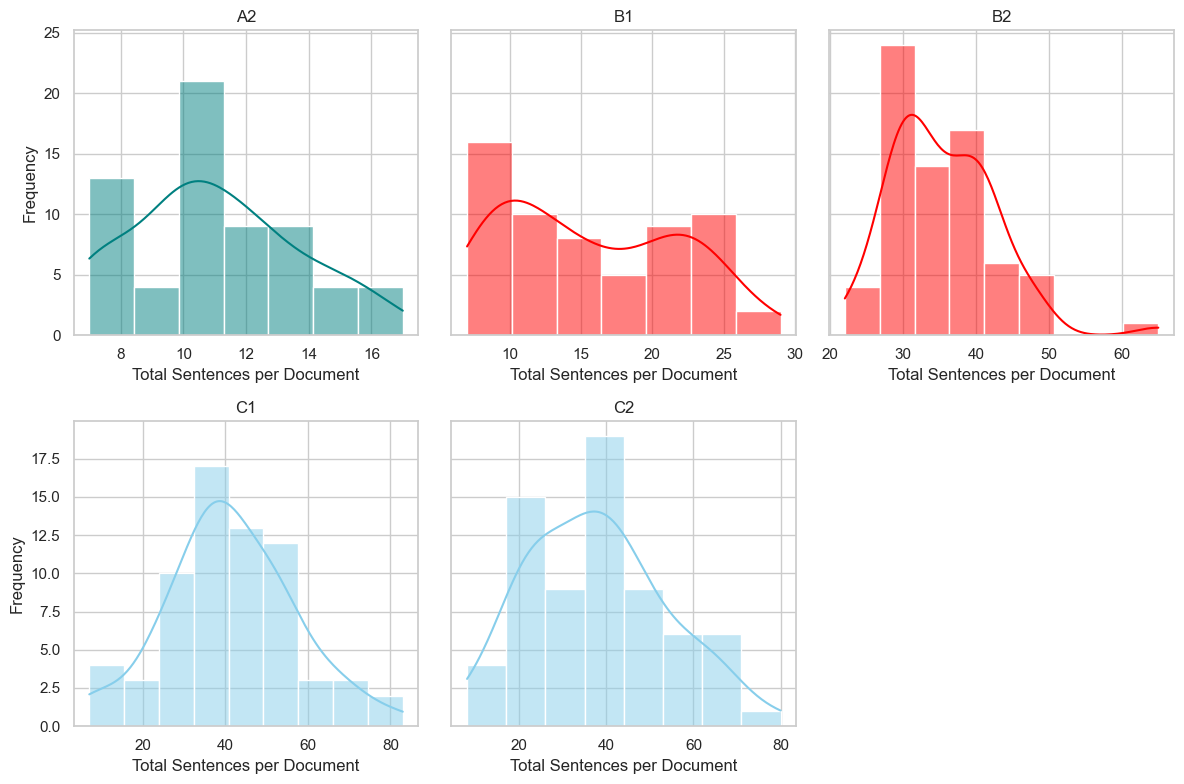

In [ ]:
multiplotter(data, 'cefr_level', 'total_sentences', 'Total Sentences per Document')

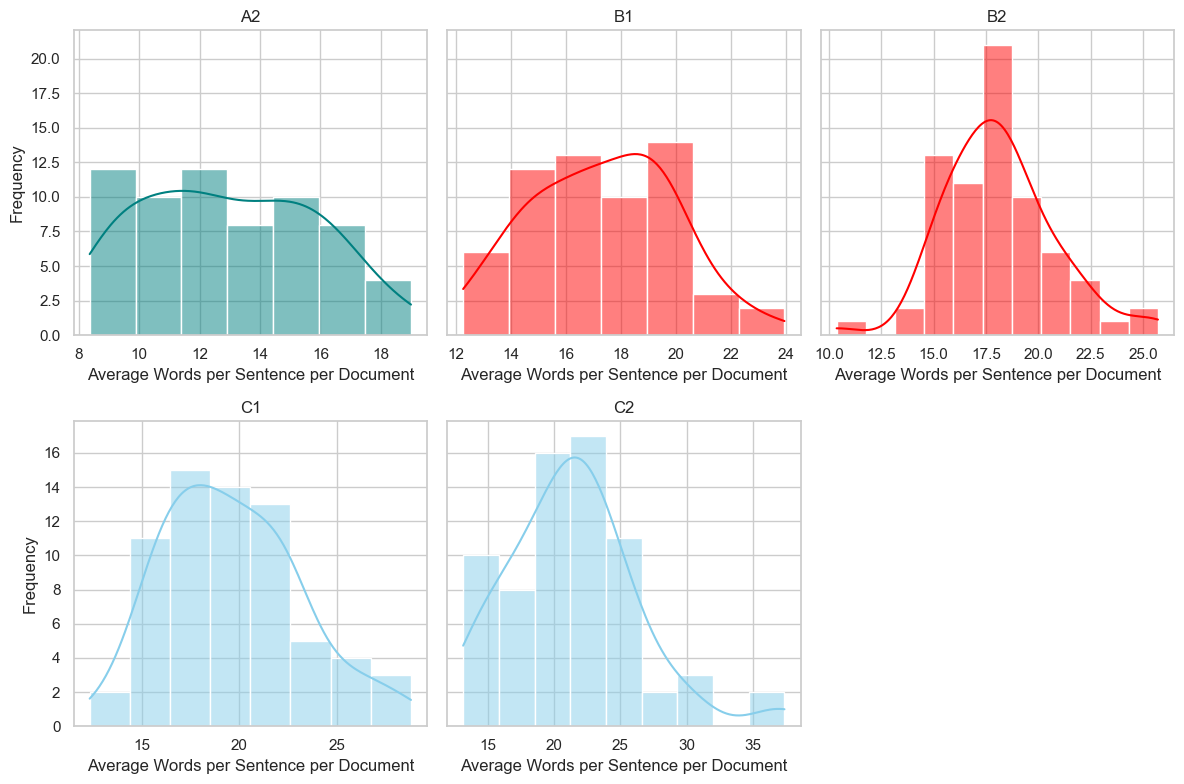

In [ ]:
multiplotter(data, 'cefr_level', 'avg_sent_len', 'Average Words per Sentence per Document')

In [ ]:
data #######for one stop english corpus

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,The Long Night This is David Reilly's first bo...,A2,186,11,16.91,35,10
1,Most house burglaries happen between 2 p.m. an...,A2,196,12,16.33,23,6
2,One very famous place for tourists in London i...,A2,116,10,11.60,19,6
3,To: All staff Subject: Holidays From: D Brown ...,A2,110,8,13.75,35,1
4,Canada Geese are large blue and white birds. W...,A2,197,16,12.31,23,5
...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,775,40,19.38,48,1
327,"A course at the Bamboo Bike Club, run by engin...",C2,885,47,18.83,56,3
328,The two sisters kept Lily's driving a secret f...,C2,950,62,15.32,47,2
329,I have never begun a novel with more misgiving...,C2,780,30,26.00,55,8


In [ ]:
sentence_df   #######for cambridge corpus

,text,num_of_words,avg_len_words,level,doc_id,text_clean,Lemmatized,Stemmed
0,The Long Night This is David Reilly's first book.,10,3.90,A2,0,long night david first book,long night david first book,long night david first book
1,David became a writer after teaching English f...,10,5.30,A2,0,david became writer teaching english several y...,david became writer teaching english several year,david becam writer teach english sever year
2,"Maha is a nurse in northern Australia, where s...",14,4.29,A2,0,maha nurse northern australia works small hosp...,maha nurse northern australia work small hospital,maha nurs northern australia work small hospit
3,One day a baby is so ill that Maha has to driv...,22,3.23,A2,0,one day baby ill maha drive night get nearest ...,one day baby ill maha drive night get nearest ...,one day babi ill maha drive night get nearest ...
4,They have a lot of problems getting there and ...,19,4.47,A2,0,lot problems getting hard work exciting story ...,lot problem getting hard work exciting story j...,lot problem get hard work excit stori joanna t...
...,...,...,...,...,...,...,...,...
9532,It seems that a bunch of scientists are gettin...,30,4.63,C2,330,seems bunch scientists getting hot collar driv...,seems bunch scientist getting hot collar drive...,seem bunch scientist get hot collar drive scie...
9533,Sure we all know its the age-old quest for kno...,23,4.26,C2,330,sure know quest knowledge desire understand ev...,sure know quest knowledge desire understand ev...,sure know quest knowledg desir understand ever...
9534,But what these guys want to know is why we wan...,31,3.42,C2,330,guys want know want know first place science e...,guy want know want know first place science ex...,guy want know want know first place scienc exp...
9535,"Surely, it's more important to know whether wh...",28,4.18,C2,330,surely important know whether scientists right...,surely important know whether scientist right ...,sure import know whether scientist right rathe...


### checking corelation for sentence_df

In [310]:
correlation_matrix_for_sentence_df=sentence_df[['num_of_words','avg_len_words']].corr()
correlation_matrix_for_sentence_df

,num_of_words,avg_len_words
num_of_words,1.000000,0.046664
avg_len_words,0.046664,1.000000


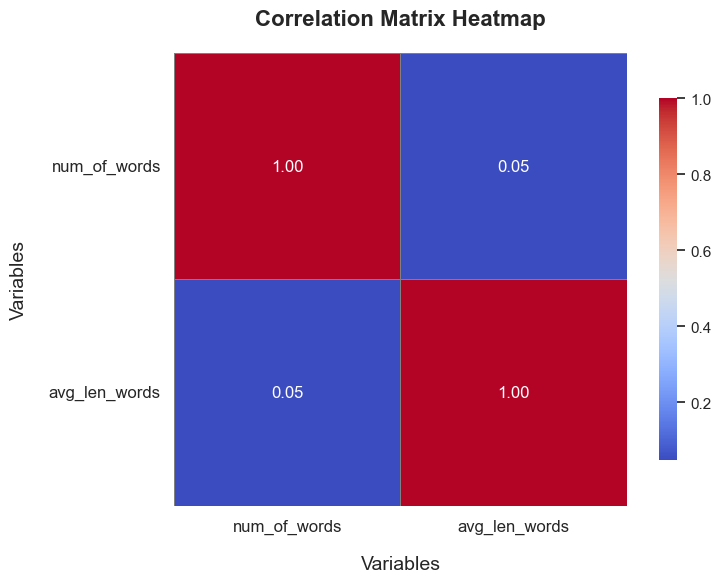

In [316]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_for_sentence_df, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12},
            linewidths=0.5, linecolor='gray', square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Variables', fontsize=14, labelpad=15)
plt.ylabel('Variables', fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()

### checking correlation for data

In [312]:
correlation_matrix_for_data=data[['total_words','total_sentences','avg_sent_len','max_sent_len','min_sent_len']].corr()
correlation_matrix_for_data

,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
total_words,1.000000,0.924084,0.479105,0.683796,-0.289306
total_sentences,0.924084,1.000000,0.154624,0.514194,-0.442856
avg_sent_len,0.479105,0.154624,1.000000,0.681474,0.373970
max_sent_len,0.683796,0.514194,0.681474,1.000000,-0.076258
min_sent_len,-0.289306,-0.442856,0.373970,-0.076258,1.000000


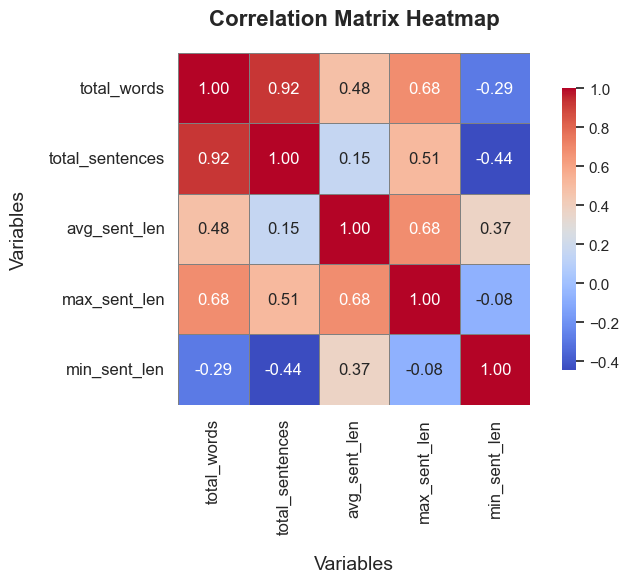

In [315]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_for_data, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12},
            linewidths=0.5, linecolor='gray', square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel('Variables', fontsize=14, labelpad=15)
plt.ylabel('Variables', fontsize=14, labelpad=15)
plt.tight_layout()
plt.show()